# Figure S1: Global optimization over parameters

This notebook contains the analysis of a direct global opimization over all four parameters ($p, q, c_{\rm constitutive}, p_{\rm uptake}$) of the model as a function of the pathogen statistics. It can be thought of as a supplement to Figure 1, motivating the choice of immune strategies considered for determining the phase boundaries.

Prerequisites:

To generate the data type:
    
    make run
    make agg
    
This notebook also needs the phase data from Figure 2.

Import a number of packages that we will need in the following.

In [1]:
import sys
sys.path.append('../lib/')
import numpy as np
import matplotlib.text
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import shapely.ops
import plotting
import evolimmune
from plotting import *
import analysis
%load_ext autoreload
%autoreload 2
plt.style.use(['paper'])
eps = 1e-8

use czrecursion, cztogrowthrate
use cstepmarkov


Load phase boundary data

In [2]:
df = analysis.loadnpz('../fig2/data/phases.npz')
polygons = evolimmune.polygons_from_boundaries(df, yconv=evolimmune.to_tau)
phases = evolimmune.phases_from_polygons(polygons)
qpos = (polygons['complete']-polygons['ac'])-polygons['pm'].intersection(polygons['pi'])-(polygons['complete']-polygons['io'])
puppos = polygons['complete']-shapely.ops.cascaded_union((polygons['ac'],
                                                          polygons['pm'],
                                                          polygons['complete']-polygons['mi']))

In [3]:
analysis.printunique(df)

boundtol: 0.005
cup: 0.1*pup+pup**2
deltainit: 0.02
deltatol: 0.0005
lambda_: 3.0
logfeps: -9.0
mus: 1.0-2.0*epsilon/(1.0+epsilon), 1.0+0.8*epsilon
nburnin: 10000.0
niter: 1000000.0
qboundtol: 0.0005
xtol: 0.025
xtolbound: 0.01


Load optimization data

In [4]:
dft = analysis.loadnpz('data/opt.npz')
evolimmune.derived_quantities(dft)

In [5]:
analysis.printunique(dft)

alpha: 0.005
cup: 0.1*pup+pup**2
deltainit: 0.02
deltatol: 0.005
lambda_: 3.0
logfeps: -9.0
maxf: 10000.0
mus: 1.0-2.0*epsilon/(1.0+epsilon), 1.0+0.8*epsilon
nburnin: 10000.0
niter: 1000000.0


Put it all together and produce the final figure

/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.0+335.g8928311-py2.7-linux-x86_64.egg/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


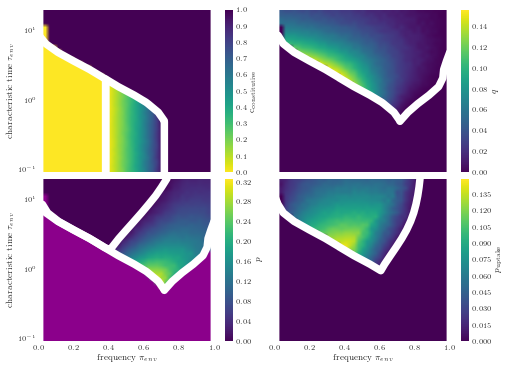

In [6]:
variables = ['cconstitutive',  'q', 'p', 'pup']
fig, axesgrid = plt.subplots(nrows=2, ncols=2, figsize=(7, 5.0), sharey=True, sharex=True)
ymin, ymax = 0.09, 20.0
axes = axesgrid.flatten()
boundarykwargs = dict(ylimmax=ymax, ylimmin=ymin, lw=7.5, color='w')
for counter, var in enumerate(variables):
    ax = axes[counter]
    cmap = cm.viridis if var != 'cconstitutive' else cm.viridis_r
    cmap.set_bad('darkmagenta', 1.)
    im, cbar = plotting.heatmap(dft.pivot(index='tauenv', columns='pienv', values=var),
                     imshow=True, zlabel=evolimmune.varname_to_tex[var], cmap=cmap, ax=ax,
                     interpolation='bilinear')
    cbar.outline.set_linewidth(0.0)
    if var == 'cconstitutive':
        analysis.plot_interior_boundary(ax, phases['p'], **boundarykwargs)
        analysis.plot_interior_boundary(ax, phases['a'], **boundarykwargs)
    elif var in ['q', 'p']:
        analysis.plot_interior_boundary(ax, qpos, **boundarykwargs)
        if var == 'p':
            analysis.plot_interior_boundary(ax, phases['c'], **boundarykwargs)
    elif var == 'pup':
        analysis.plot_interior_boundary(ax, puppos, **boundarykwargs)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(ymin, ymax)
    ax.set_yscale('log')
    plotting.despine(ax, spines='all')
for ax in axesgrid[:, 0]:
    ax.set_ylabel(r'characteristic time $\tau_{env}$')
for ax in axesgrid[-1, :]:
    ax.set_xlabel('frequency $\pi_{env}$')
fig.tight_layout(pad=0.25)
fig.savefig('SIopt.pdf')

**Optimal parameters from a global optimization of long-term growth rate.** Regions where a parameter is unconstrained at the optimum are shown in purple. Phase boundaries pertaining to the shown parameter in white. A maximum number of 10000 function evaluations is used for the first phase of the optimization. The same model parameters as in Fig. 2 are used.